<a href="https://colab.research.google.com/github/hamm0o0d/Hotel_reservation_prediction/blob/main/project_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# pip install ydata-profiling
#

# **imports and load data**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
from sklearn.ensemble import StackingClassifier, VotingClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
import pickle



In [3]:
data = pd.read_csv('/content/first inten project.csv')
data

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


In [4]:
data['market segment type'].value_counts()

market segment type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

# **EDA & Plotting**

In [5]:
data['market segment type'].value_counts()

market segment type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [7]:
data.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [8]:
data.nunique()

Booking_ID                  36285
number of adults                5
number of children              6
number of weekend nights        8
number of week nights          18
type of meal                    4
car parking space               2
room type                       7
lead time                     352
market segment type             5
repeated                        2
P-C                             9
P-not-C                        59
average price                3930
special requests                6
date of reservation           553
booking status                  2
dtype: int64

In [9]:
# profile = ProfileReport(data, title="Pandas Profiling Report")
# profile.to_file("profile_report.html")
# profile

# **prepare the data**

**checking outliers**

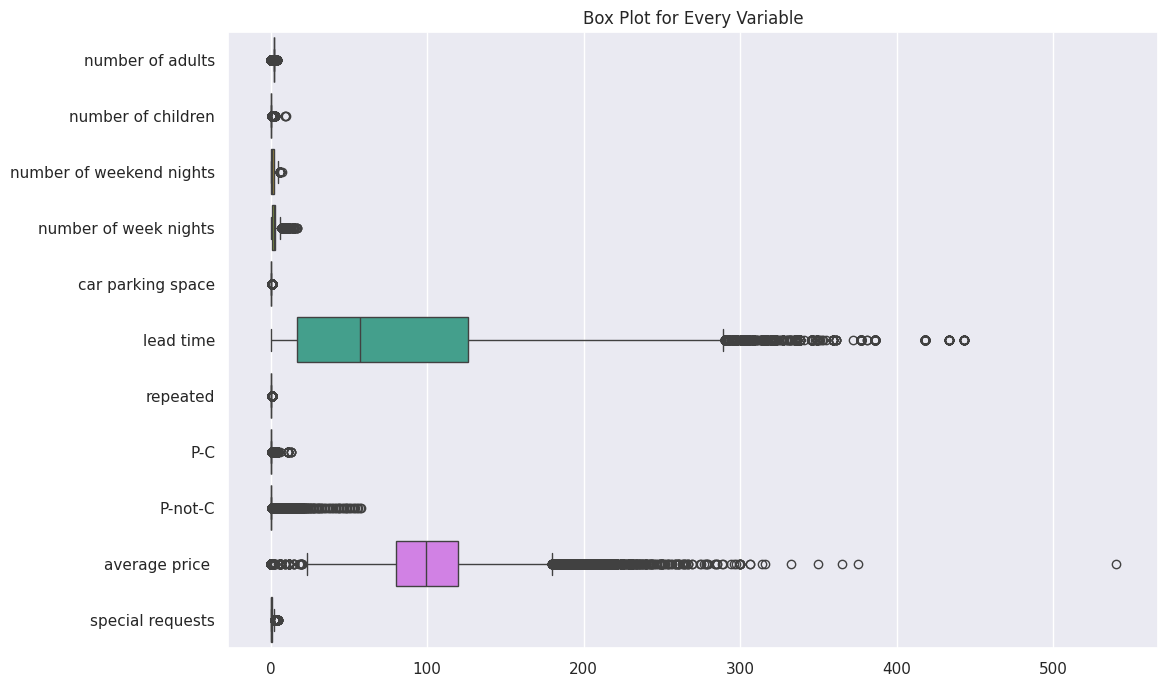

(36285, 17)


In [10]:
# Create box plots for every variable before droping outliers
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
sns.boxplot(data=data, orient="h")
plt.title("Box Plot for Every Variable")
plt.show()
print(data.shape)

In [11]:
# Trim extra spaces from column names
data.columns = data.columns.str.strip()

In [12]:
# from sklearn.preprocessing import FunctionTransformer

# # Custom function to apply
# def log_transform(x):
#     return np.log1p(x)  # log(1 + x) to handle zero values safely


In [13]:
# from sklearn.base import BaseEstimator, TransformerMixin

# class OutlierRemover(BaseEstimator, TransformerMixin):
#     def __init__(self, factor=1.5, features=None):
#         self.factor = factor  # The multiplier for the IQR
#         self.features = features  # List of column names to check for outliers

#     def fit(self, X, y=None):
#         # Calculate the IQR and bounds for specified features to detect outliers
#         if self.features is None:
#             self.features = X.columns.tolist()

#         self.bounds_ = {}
#         for feature in self.features:
#             if X[feature].dtype in ["int64", "float64"]:
#                 q1 = X[feature].quantile(0.25)
#                 q3 = X[feature].quantile(0.75)
#                 iqr = q3 - q1
#                 lower_bound = q1 - self.factor * iqr
#                 upper_bound = q3 + self.factor * iqr
#                 self.bounds_[feature] = (lower_bound, upper_bound)
#         return self

#     def transform(self, X):
#         X = X.copy()  # Avoid changes to the original data
#         for feature, bounds in self.bounds_.items():
#             X = X[(X[feature] >= bounds[0]) & (X[feature] <= bounds[1])]
#         return X


In [14]:
# class DropColumns(BaseEstimator, TransformerMixin):
#     def __init__(self, cols_to_drop):
#         self.cols_to_drop = cols_to_drop

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         return X.drop(self.cols_to_drop, axis=1, errors='ignore')


In [15]:
import pandas as pd
# from sklearn.preprocessing import FunctionTransformer
# from sklearn.pipeline import Pipeline

def process_date_column(df):
    # Remove rows where the date of reservation contains a dash
    df = df[~df["date of reservation"].str.contains("-")]

    # Convert the date of reservation to datetime
    df["date of reservation"] = pd.to_datetime(df["date of reservation"])

    # Extract features from the date
    df['day_of_week'] = df['date of reservation'].dt.dayofweek
    df["day"] = df["date of reservation"].dt.day
    df["month"] = df["date of reservation"].dt.month
    df["year"] = df["date of reservation"].dt.year

    # Drop the original datetime column
    df = df.drop(columns=["date of reservation"])

    return df


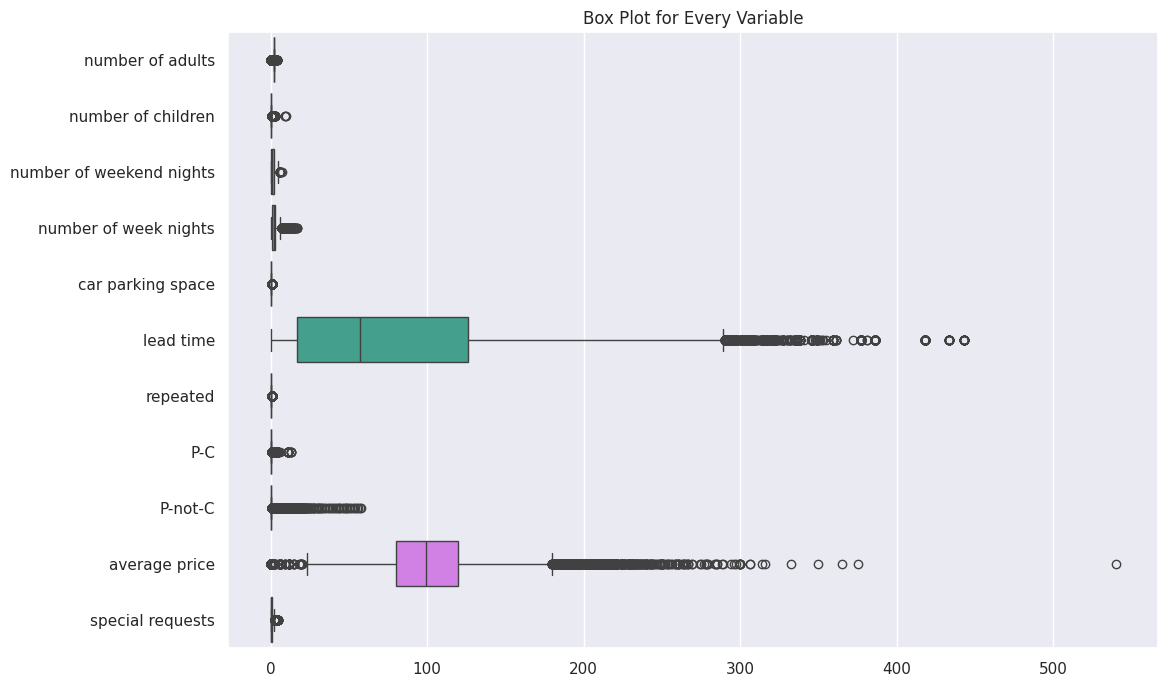

(36285, 17)


In [16]:
# Create box plots for every variable after dropping outliers
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
data_boxplot = sns.boxplot(data=data, orient="h")
plt.title("Box Plot for Every Variable")
plt.show()
print(data.shape)

**cleansing, preprocessing, Feature Engineering & Feature Selection**

In [17]:
# deleting Booking_ID column
# data.drop(columns=['Booking_ID'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [18]:
data = data[~data["date of reservation"].str.contains("-")]
data["date of reservation"] = pd.to_datetime(data["date of reservation"])


data['day_of_week'] = data['date of reservation'].dt.dayofweek
data["day"] = data["date of reservation"].dt.day
data["month"] = data["date of reservation"].dt.month
data["year"] = data["date of reservation"].dt.year

# Drop the original datetime column
data = data.drop(columns=["date of reservation"])
data.info()

<ipython-input-18-24322962b9c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["date of reservation"] = pd.to_datetime(data["date of reservation"])
<ipython-input-18-24322962b9c7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_of_week'] = data['date of reservation'].dt.dayofweek
<ipython-input-18-24322962b9c7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

<class 'pandas.core.frame.DataFrame'>
Index: 36248 entries, 0 to 36284
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36248 non-null  object 
 1   number of adults          36248 non-null  int64  
 2   number of children        36248 non-null  int64  
 3   number of weekend nights  36248 non-null  int64  
 4   number of week nights     36248 non-null  int64  
 5   type of meal              36248 non-null  object 
 6   car parking space         36248 non-null  int64  
 7   room type                 36248 non-null  object 
 8   lead time                 36248 non-null  int64  
 9   market segment type       36248 non-null  object 
 10  repeated                  36248 non-null  int64  
 11  P-C                       36248 non-null  int64  
 12  P-not-C                   36248 non-null  int64  
 13  average price             36248 non-null  float64
 14  special req

In [19]:
# binarize the target column
data["booking status"] = data["booking status"].replace("Canceled", 1)
data["booking status"] = data["booking status"].replace("Not_Canceled", 0)

In [20]:
data.drop(columns=['Booking_ID'], inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36248 entries, 0 to 36284
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36248 non-null  int64  
 1   number of children        36248 non-null  int64  
 2   number of weekend nights  36248 non-null  int64  
 3   number of week nights     36248 non-null  int64  
 4   type of meal              36248 non-null  object 
 5   car parking space         36248 non-null  int64  
 6   room type                 36248 non-null  object 
 7   lead time                 36248 non-null  int64  
 8   market segment type       36248 non-null  object 
 9   repeated                  36248 non-null  int64  
 10  P-C                       36248 non-null  int64  
 11  P-not-C                   36248 non-null  int64  
 12  average price             36248 non-null  float64
 13  special requests          36248 non-null  int64  
 14  booking sta

In [22]:
data.select_dtypes(include=["object"]).columns

Index(['type of meal', 'room type', 'market segment type'], dtype='object')

In [23]:
object_columns = data.select_dtypes(include=["object"]).columns
data = pd.get_dummies(data, columns=object_columns)
data = data.replace({True: 1, False: 0})
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36248 entries, 0 to 36284
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   number of adults                   36248 non-null  int64  
 1   number of children                 36248 non-null  int64  
 2   number of weekend nights           36248 non-null  int64  
 3   number of week nights              36248 non-null  int64  
 4   car parking space                  36248 non-null  int64  
 5   lead time                          36248 non-null  int64  
 6   repeated                           36248 non-null  int64  
 7   P-C                                36248 non-null  int64  
 8   P-not-C                            36248 non-null  int64  
 9   average price                      36248 non-null  float64
 10  special requests                   36248 non-null  int64  
 11  booking status                     36248 non-null  int64  


In [24]:
features = data.drop(["booking status"], axis=1)
target = data["booking status"]

k_best = SelectKBest(score_func=f_classif, k=7)

X = k_best.fit_transform(features, target)
y = target

# Get the indices of the selected features
selected_features_indices = k_best.get_support(indices=True)

# Get the scores associated with each feature
feature_scores = k_best.scores_

# Create a list of tuples containing feature names and scores
feature_info = list(zip(features.columns, feature_scores))

# Sort the feature info in descending order based on scores
sorted_feature_info = sorted(feature_info, key=lambda x: x[1], reverse=True)

for feature_name, feature_score in sorted_feature_info[:15]:
    print(f"{feature_name}: {feature_score:.2f}")

lead time: 8632.61
special requests: 2486.31
year: 1205.78
average price: 752.18
market segment type_Corporate: 466.80
repeated: 423.60
market segment type_Online: 412.92
number of week nights: 314.39
type of meal_Meal Plan 2: 274.19
number of adults: 273.41
car parking space: 270.37
market segment type_Complementary: 193.27
number of weekend nights: 138.20
type of meal_Meal Plan 1: 136.66
P-not-C: 131.14


In [25]:
selected_features_df = features.iloc[:, selected_features_indices]
selected_features_df.head()

,lead time,repeated,average price,special requests,year,market segment type_Corporate,market segment type_Online
0,224,0,88.00,0,2015,0,0
1,5,0,106.68,1,2018,0,1
2,1,0,50.00,0,2018,0,1
3,211,0,100.00,1,2017,0,1
4,48,0,77.00,0,2018,0,1


**train test split**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, target, test_size=0.2, random_state=7
)



In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36248 entries, 0 to 36284
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   number of adults                   36248 non-null  int64  
 1   number of children                 36248 non-null  int64  
 2   number of weekend nights           36248 non-null  int64  
 3   number of week nights              36248 non-null  int64  
 4   car parking space                  36248 non-null  int64  
 5   lead time                          36248 non-null  int64  
 6   repeated                           36248 non-null  int64  
 7   P-C                                36248 non-null  int64  
 8   P-not-C                            36248 non-null  int64  
 9   average price                      36248 non-null  float64
 10  special requests                   36248 non-null  int64  
 11  booking status                     36248 non-null  int64  


In [28]:
X_train

array([[4.100e+01, 0.000e+00, 7.033e+01, ..., 2.018e+03, 1.000e+00,
        0.000e+00],
       [3.500e+01, 0.000e+00, 1.001e+02, ..., 2.018e+03, 0.000e+00,
        1.000e+00],
       [2.540e+02, 0.000e+00, 9.100e+01, ..., 2.018e+03, 0.000e+00,
        0.000e+00],
       ...,
       [2.200e+01, 0.000e+00, 6.200e+01, ..., 2.017e+03, 1.000e+00,
        0.000e+00],
       [3.800e+01, 0.000e+00, 5.559e+01, ..., 2.018e+03, 0.000e+00,
        1.000e+00],
       [7.000e+00, 0.000e+00, 1.730e+02, ..., 2.018e+03, 0.000e+00,
        1.000e+00]])

**standardize the data**

In [31]:
from sklearn.preprocessing import StandardScaler


# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
X_train = scaler.fit_transform(X_train)

pickle.dump(scaler, open('scaler.pkl', 'wb'))

# transform the xtest
X_test = scaler.transform(X_test)




In [ ]:
X_train[0]

# **using different models and evaluating results**

In [30]:
selected_features_df

,lead time,repeated,average price,special requests,year,market segment type_Corporate,market segment type_Online
0,224,0,88.00,0,2015,0,0
1,5,0,106.68,1,2018,0,1
2,1,0,50.00,0,2018,0,1
3,211,0,100.00,1,2017,0,1
4,48,0,77.00,0,2018,0,1
...,...,...,...,...,...,...,...
36280,346,0,115.00,1,2018,0,1
36281,34,0,107.55,1,2017,0,1
36282,83,0,105.61,1,2018,0,1
36283,121,0,96.90,1,2018,0,0


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

scores = {}

Accuracy: 0.81
---------------------------------------------------------
All Scores: 
{'Logistic Regression': {'accuracy': 0.8059310344827586, 'precision': 0.7404967055245818, 'recall': 0.620118845500849, 'f1_score': 0.6749826749826751}}
---------------------------------------------------------
Confusion Matrix: 
[[4382  512]
 [ 895 1461]]


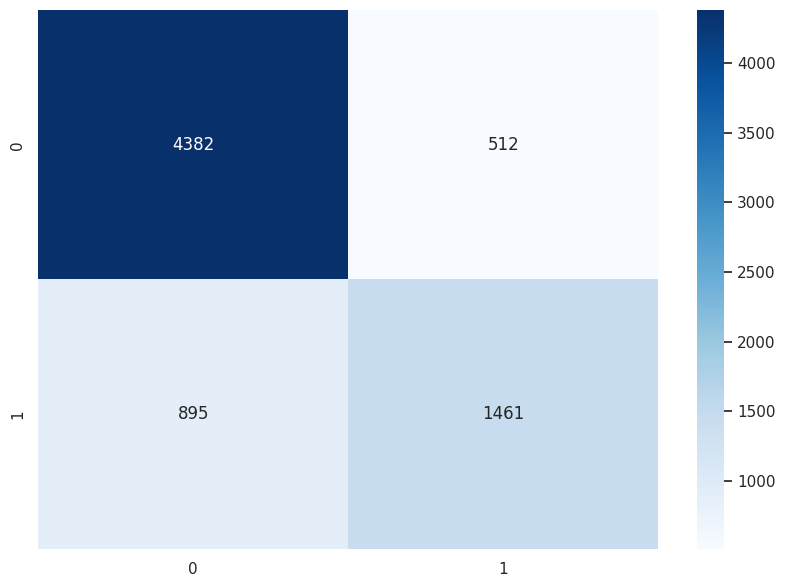

---------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      4894
           1       0.74      0.62      0.67      2356

    accuracy                           0.81      7250
   macro avg       0.79      0.76      0.77      7250
weighted avg       0.80      0.81      0.80      7250



In [32]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Create a logistic regression classifier
log_reg = LogisticRegression(C= 1, penalty= 'l1', solver='liblinear')

# # Define the parameter grid
# params = {
#     "C": [0.01, 0.1, 1, 10, 100],
#     "penalty": ["l1", "l2"],
#     "solver" :  ['liblinear','lbfgs']          #Algorithm to use in the optimization problem.
#     }

# # Create a GridSearchCV object
# grid_search = GridSearchCV(estimator=log_reg, param_grid=params, cv=5, scoring='accuracy')

# # Fit GridSearchCV
# grid_search.fit(X_train, y_train)

# # Print the best parameters and the best score
# print(f"Best Parameters: {grid_search.best_params_}")
# print(f"Best Score: {grid_search.best_score_:.4f}")

# # Get the best estimator
# best_log_reg = grid_search.best_estimator_


# from sklearn.metrics import precision_recall_fscore_support

# # Predict using the best estimator
# y_pred = best_log_reg.predict(X_test)

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Initialize a dictionary to keep track of model scores if not already done

scores["Logistic Regression"] = {
    "accuracy": accuracy
}

# Get precision, recall, f1-score, and support
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='binary')

# You can adjust the 'average' parameter to other values like 'micro', 'macro', or 'weighted' depending on your data distribution and what you consider as a positive class

# Store these values in the dictionary
scores["Logistic Regression"]["precision"] = precision
scores["Logistic Regression"]["recall"] = recall
scores["Logistic Regression"]["f1_score"] = f1

# Print all scores
print("---------------------------------------------------------")
print(f"All Scores: \n{scores}")

# Print the confusion matrix
print("---------------------------------------------------------")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt=".0f")
plt.show()

# Print and plot the classification report
print("---------------------------------------------------------")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")



Accuracy: 0.88
---------------------------------------------------------
All Scores: 
{'Logistic Regression': {'accuracy': 0.8059310344827586, 'precision': 0.7404967055245818, 'recall': 0.620118845500849, 'f1_score': 0.6749826749826751}, 'KNN': {'accuracy': 0.8813793103448276, 'precision': 0.8369369369369369, 'recall': 0.7886247877758913, 'f1_score': 0.8120629370629371}}
---------------------------------------------------------
Confusion Matrix: 
[[4532  362]
 [ 498 1858]]


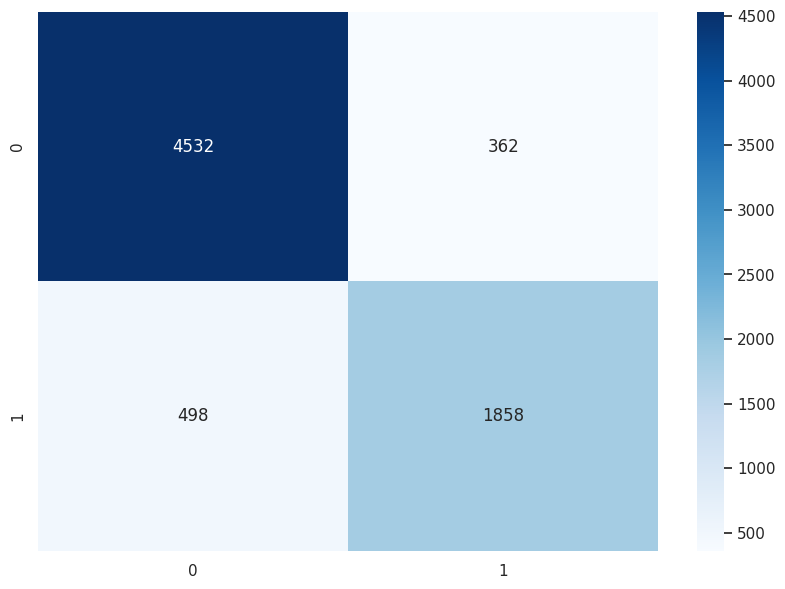

---------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      4894
           1       0.84      0.79      0.81      2356

    accuracy                           0.88      7250
   macro avg       0.87      0.86      0.86      7250
weighted avg       0.88      0.88      0.88      7250



In [33]:
knn = KNeighborsClassifier(n_neighbors= 40,p= 2, weights= 'distance')

# params = {
#     "n_neighbors": np.arange(10, 50,10),
#     "weights": ["uniform","distance"],
#     "p" : [1,2]
#     }

# grid_search = GridSearchCV(knn, param_grid=params, cv=5)
# grid_search.fit(X_train, y_train)
# print(f"Best Parameters: {grid_search.best_params_}")
# print(f"Best Score: {grid_search.best_score_}")


# best_knn = grid_search.best_estimator_
# y_pred = best_knn.predict(X_test)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)



# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


from sklearn.metrics import precision_recall_fscore_support

# Initialize a dictionary to keep track of model scores if not already done

scores["KNN"] = {
    "accuracy": accuracy
}

# Get precision, recall, f1-score, and support
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='binary')


# Store these values in the dictionary
scores["KNN"]["precision"] = precision
scores["KNN"]["recall"] = recall
scores["KNN"]["f1_score"] = f1

# Print all scores
print("---------------------------------------------------------")
print(f"All Scores: \n{scores}")

# Print the confusion matrix
print("---------------------------------------------------------")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt=".0f")
plt.show()

# Print and plot the classification report
print("---------------------------------------------------------")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")



Accuracy: 0.86
---------------------------------------------------------
All Scores: 
{'Logistic Regression': {'accuracy': 0.8059310344827586, 'precision': 0.7404967055245818, 'recall': 0.620118845500849, 'f1_score': 0.6749826749826751}, 'KNN': {'accuracy': 0.8813793103448276, 'precision': 0.8369369369369369, 'recall': 0.7886247877758913, 'f1_score': 0.8120629370629371}, 'DecisionTree': {'accuracy': 0.8622068965517241, 'precision': 0.8011540168664003, 'recall': 0.7661290322580645, 'f1_score': 0.7832501627251031}}
---------------------------------------------------------
Confusion Matrix: 
[[4446  448]
 [ 551 1805]]


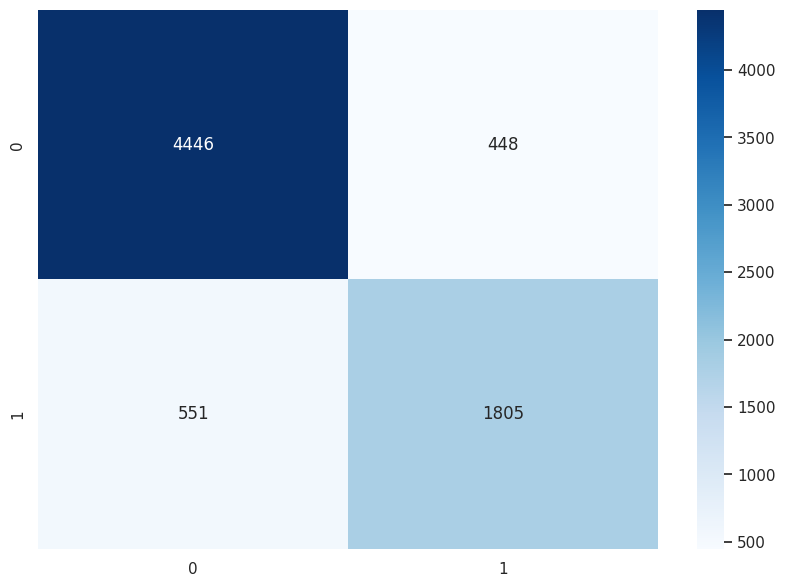

---------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      4894
           1       0.80      0.77      0.78      2356

    accuracy                           0.86      7250
   macro avg       0.85      0.84      0.84      7250
weighted avg       0.86      0.86      0.86      7250



In [34]:
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth =15, max_features='sqrt', min_samples_split= 5)

# params = {
#           "max_depth": np.arange(0, 20, 5),
#           "criterion": ["gini", "entropy"],
#           'min_samples_split': [2, 5, 10],
#           'max_features': ['auto', 'sqrt', 'log2 '],
#           }

# grid_search = GridSearchCV(dt, param_grid=params, cv=5)
# grid_search.fit(X_train, y_train)
# print(f"Best Parameters: {grid_search.best_params_}")
# print(f"Best Score: {grid_search.best_score_}")



# best_dt = grid_search.best_estimator_

# y_pred = best_dt.predict(X_test)


dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)



# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


from sklearn.metrics import precision_recall_fscore_support

# Initialize a dictionary to keep track of model scores if not already done

scores["DecisionTree"] = {
    "accuracy": accuracy
}

# Get precision, recall, f1-score, and support
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='binary')



# Store these values in the dictionary
scores["DecisionTree"]["precision"] = precision
scores["DecisionTree"]["recall"] = recall
scores["DecisionTree"]["f1_score"] = f1

# Print all scores
print("---------------------------------------------------------")
print(f"All Scores: \n{scores}")

# Print the confusion matrix
print("---------------------------------------------------------")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt=".0f")
plt.show()

# Print and plot the classification report
print("---------------------------------------------------------")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")



Accuracy: 0.88
---------------------------------------------------------
All Scores: 
{'Logistic Regression': {'accuracy': 0.8059310344827586, 'precision': 0.7404967055245818, 'recall': 0.620118845500849, 'f1_score': 0.6749826749826751}, 'KNN': {'accuracy': 0.8813793103448276, 'precision': 0.8369369369369369, 'recall': 0.7886247877758913, 'f1_score': 0.8120629370629371}, 'DecisionTree': {'accuracy': 0.8622068965517241, 'precision': 0.8011540168664003, 'recall': 0.7661290322580645, 'f1_score': 0.7832501627251031}, 'RandomForest': {'accuracy': 0.8762758620689656, 'precision': 0.8394602140530479, 'recall': 0.765704584040747, 'f1_score': 0.8008879023307437}}
---------------------------------------------------------
Confusion Matrix: 
[[4549  345]
 [ 552 1804]]


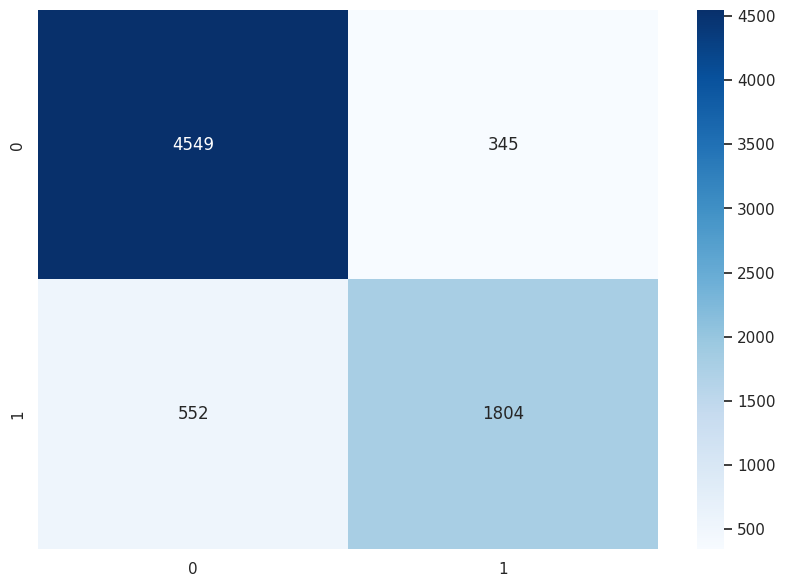

---------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4894
           1       0.84      0.77      0.80      2356

    accuracy                           0.88      7250
   macro avg       0.87      0.85      0.86      7250
weighted avg       0.87      0.88      0.87      7250



In [35]:
rf = RandomForestClassifier(random_state=42,criterion= 'gini', max_depth= None, max_features= 'sqrt', min_samples_split= 10, n_estimators= 200)

# params= {
#     'n_estimators': [20,100, 200],
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'max_features': ['auto', 'sqrt', 'log2'],
# }

# grid_search = GridSearchCV(rf, param_grid=params, cv=5)
# grid_search.fit(X_train, y_train)
# print(f"Best Parameters: {grid_search.best_params_}")
# print(f"Best Score: {grid_search.best_score_}")



# best_rf = grid_search.best_estimator_

# y_pred = best_rf.predict(X_test)


rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



# Initialize a dictionary to keep track of model scores if not already done

scores["RandomForest"] = {
    "accuracy": accuracy
}

# Get precision, recall, f1-score, and support
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='binary')



# Store these values in the dictionary
scores["RandomForest"]["precision"] = precision
scores["RandomForest"]["recall"] = recall
scores["RandomForest"]["f1_score"] = f1

# Print all scores
print("---------------------------------------------------------")
print(f"All Scores: \n{scores}")

# Print the confusion matrix
print("---------------------------------------------------------")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt=".0f")
plt.show()

# Print and plot the classification report
print("---------------------------------------------------------")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")



Accuracy: 0.87
---------------------------------------------------------
All Scores: 
{'Logistic Regression': {'accuracy': 0.8059310344827586, 'precision': 0.7404967055245818, 'recall': 0.620118845500849, 'f1_score': 0.6749826749826751}, 'KNN': {'accuracy': 0.8813793103448276, 'precision': 0.8369369369369369, 'recall': 0.7886247877758913, 'f1_score': 0.8120629370629371}, 'DecisionTree': {'accuracy': 0.8622068965517241, 'precision': 0.8011540168664003, 'recall': 0.7661290322580645, 'f1_score': 0.7832501627251031}, 'RandomForest': {'accuracy': 0.8762758620689656, 'precision': 0.8394602140530479, 'recall': 0.765704584040747, 'f1_score': 0.8008879023307437}, 'stacking': {'accuracy': 0.8739310344827587, 'precision': 0.839134524929445, 'recall': 0.7572156196943973, 'f1_score': 0.7960731816153502}}
---------------------------------------------------------
Confusion Matrix: 
[[4552  342]
 [ 572 1784]]


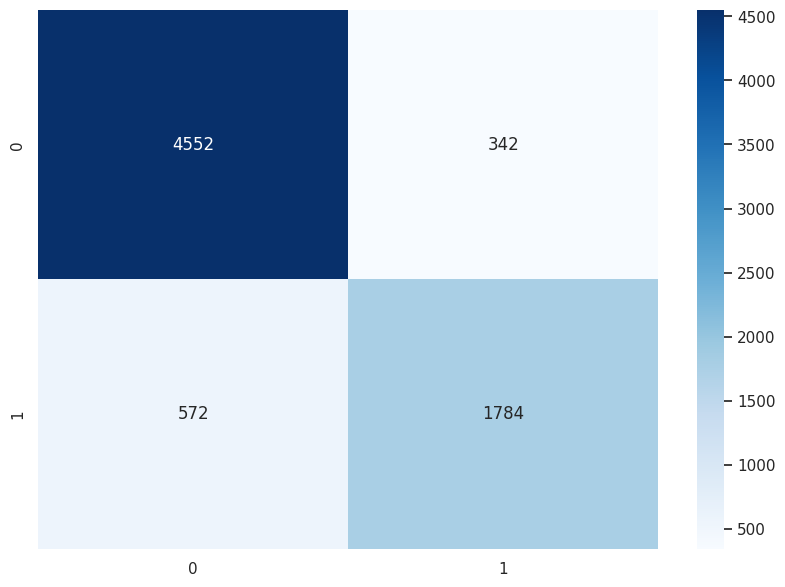

---------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4894
           1       0.84      0.76      0.80      2356

    accuracy                           0.87      7250
   macro avg       0.86      0.84      0.85      7250
weighted avg       0.87      0.87      0.87      7250



In [36]:

# Initialize Stacking classifier with meta-classifier RandomForest
stacking = StackingClassifier(estimators=[('rf', rf),('knn',knn),('dt',dt),('log_reg',log_reg)], final_estimator=RandomForestClassifier(random_state=42))

# Train Stacking model
stacking.fit(X_train, y_train)

# Predict using Stacking model
y_pred = stacking.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Initialize a dictionary to keep track of model scores if not already done

scores["stacking"] = {
    "accuracy": accuracy
}

# Get precision, recall, f1-score, and support
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='binary')



# Store these values in the dictionary
scores["stacking"]["precision"] = precision
scores["stacking"]["recall"] = recall
scores["stacking"]["f1_score"] = f1

# Print all scores
print("---------------------------------------------------------")
print(f"All Scores: \n{scores}")

# Print the confusion matrix
print("---------------------------------------------------------")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt=".0f")
plt.show()

# Print and plot the classification report
print("---------------------------------------------------------")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

**comparing results**

In [37]:
for score, value in scores.items():
    if isinstance(value, dict):
        print(f"{score:<20} Acc: {value['accuracy']:>7.4f} | Prec: {value['precision']:>7.4f} | Recall: {value['recall']:>7.4f} | F1: {value['f1_score']:>7.4f}")
    else:
        print(f"{score:<20} {value:>7.4f}")


Logistic Regression  Acc:  0.8059 | Prec:  0.7405 | Recall:  0.6201 | F1:  0.6750
KNN                  Acc:  0.8814 | Prec:  0.8369 | Recall:  0.7886 | F1:  0.8121
DecisionTree         Acc:  0.8622 | Prec:  0.8012 | Recall:  0.7661 | F1:  0.7833
RandomForest         Acc:  0.8763 | Prec:  0.8395 | Recall:  0.7657 | F1:  0.8009
stacking             Acc:  0.8739 | Prec:  0.8391 | Recall:  0.7572 | F1:  0.7961


**save the best model**

In [38]:
pickle_file = "KNN.pkl"
with open(pickle_file, 'wb') as file:
    pickle.dump(knn, file)


'''
or
pickle.dump(rf, open(pickle_file, 'wb'))
'''


"\nor\npickle.dump(rf, open(pickle_file, 'wb'))\n"